1838 - 1839

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

X = train_dataset.iloc[:, :-1]
y = train_dataset.iloc[:, -1]


In [3]:
miss_count_train = train_dataset.isnull().sum()
miss_count_test = test_dataset.isnull().sum()

In [4]:
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [5]:
train_dataset[numerical_columns] = train_dataset[numerical_columns].fillna(-1)
test_dataset[numerical_columns] = test_dataset[numerical_columns].fillna(-1)

train_dataset[categorical_columns] = train_dataset[categorical_columns].fillna("Unknown")
test_dataset[categorical_columns] = test_dataset[categorical_columns].fillna("Unknown")

In [6]:
categorical_features = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Policy Type']
numerical_features = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Vehicle Age']

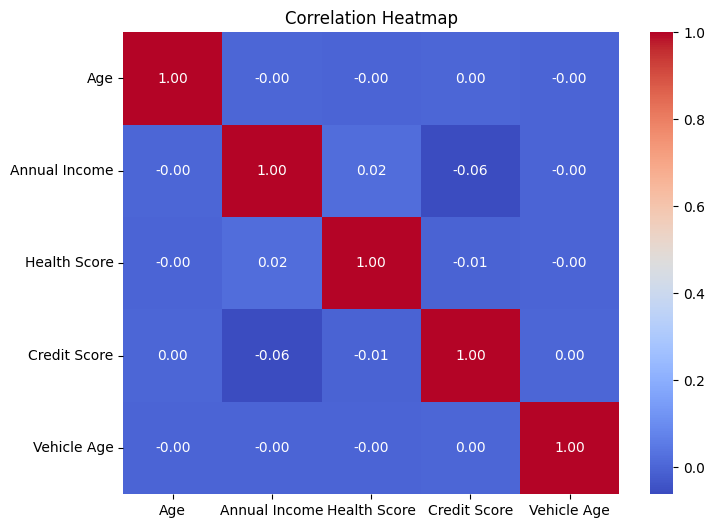

In [7]:
corr_matrix = train_dataset[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
categorical_features = categorical_columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [10]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [11]:
X_test_dataset = column_transformer.transform(test_dataset)

In [12]:
reg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7)
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
y_pred = reg.predict(X_test)
y_test_pred = reg.predict(X_test_dataset)

In [15]:
submission_df = pd.read_csv('sample_submission.csv')
submission_df['Premium Amount'] = y_test_pred
submission_df.to_csv('submission_xgbr.csv', index=False)
print(submission_df.head())

        id  Premium Amount
0  1200000     1181.875244
1  1200001     1125.400146
2  1200002     1081.915283
3  1200003     1086.906738
4  1200004     1037.115112
